In [3]:
import pandas as pd

df = pd.read_csv("sev_test.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Description,Severity,Label
0,28001,28507,When prompted by authentication dialog box fo...,major,1
1,28002,28508,Hyatt and I talked about this we need a way ...,normal,0
2,28003,28509,Risto IIRC this is something that people ha...,minor,0
3,28004,28510,From Bugzilla Helper \n\nUser Agent Mozilla ...,normal,0
4,28005,28511,DESCRIPTION I took a quick look at nsStr le...,normal,0


In [5]:
# 📌 Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")

# 📌 Check data types and nulls
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  4427 non-null   object
 1   Severity     4427 non-null   object
 2   Label        4427 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.9+ KB
None

Missing values:
Description    0
Severity       0
Label          0
dtype: int64


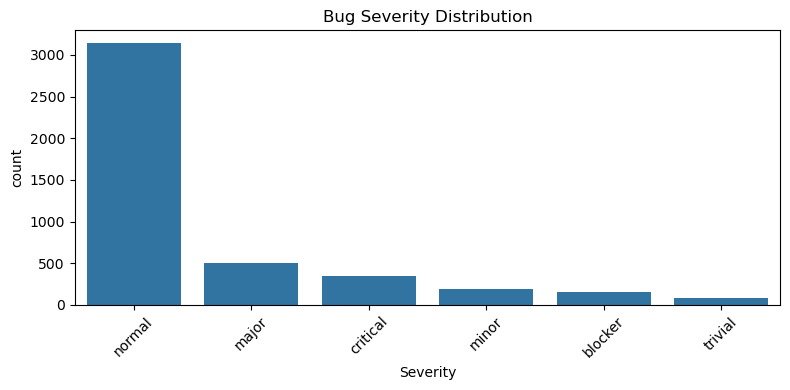

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Severity", order=df["Severity"].value_counts().index)
plt.title("Bug Severity Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# 📌 Add a description length column
df["desc_length"] = df["Description"].astype(str).apply(len)

# 📌 View basic stats
print("\nDescription Length Summary:")
print(df["desc_length"].describe())



Description Length Summary:
count     4427.000000
mean      2023.380619
std       3206.287683
min          9.000000
25%        647.000000
50%       1124.000000
75%       2164.000000
max      93997.000000
Name: desc_length, dtype: float64


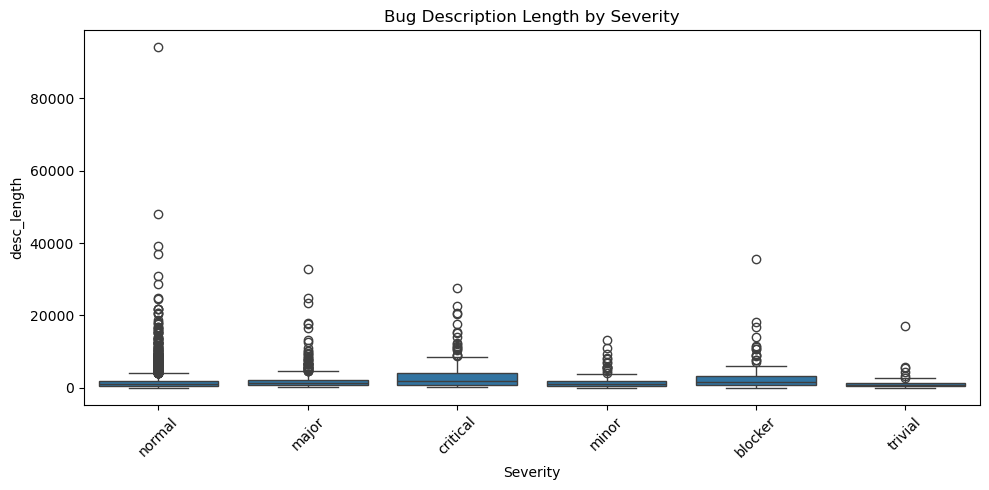

In [11]:
# 📊 Compare description lengths across severity levels

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Severity", y="desc_length", order=df["Severity"].value_counts().index)
plt.title("Bug Description Length by Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
!pip install wordcloud

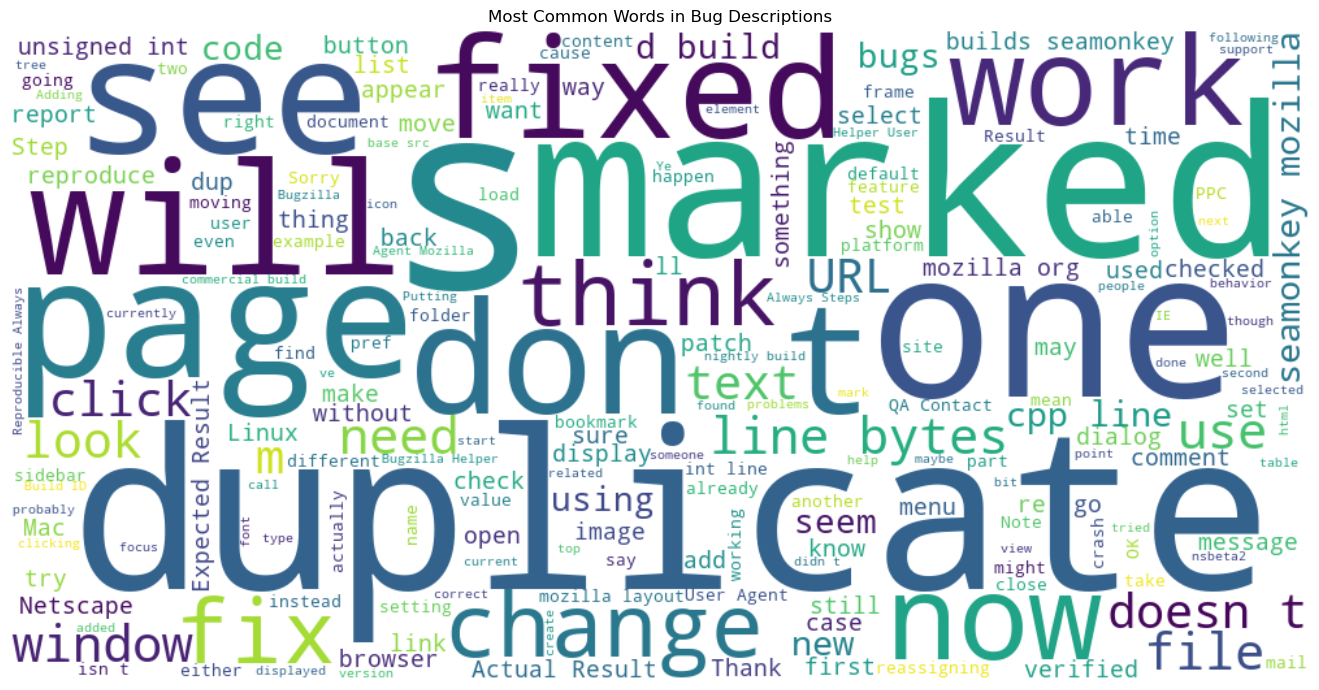

In [17]:
from wordcloud import WordCloud, STOPWORDS

# Combine all descriptions into one big string
text = " ".join(df["Description"].dropna().astype(str))

# Add custom stopwords if you want
stopwords = set(STOPWORDS)
stopwords.update(["bug", "issue", "problem", "error", "failed", "system", "component"])  # optional

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white", stopwords=stopwords).generate(text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Bug Descriptions")
plt.tight_layout()
plt.savefig("wordcloud_all_bugs.png")  # save for your GitHub later
plt.show()